### Context

A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service

### Content

| Feature | Definition |
| :- | :- |
| AcceptedCmp1 | 1 if customer accepted the offer in the 1st campaign, 0 otherwise |
| AcceptedCmp2 | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise |
| AcceptedCmp3 | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise |
| AcceptedCmp4 | 1 if customer accepted the offer in the 4th campaign, 0 otherwise |
| AcceptedCmp5 | 1 if customer accepted the offer in the 5th campaign, 0 otherwise |
| Response (target) | 1 if customer accepted the offer in the last campaign, 0 otherwise |
| Complain | 1 if customer complained in the last 2 years |
| DtCustomer | date of customer’s enrolment with the company |
| Education | customer’s level of education |
| Marital | customer’s marital status |
| Kidhome | number of small children in customer’s household |
| Teenhome | number of teenagers in customer’s household |
| Income | customer’s yearly household income |
| MntFishProducts | amount spent on fish products in the last 2 years |
| MntMeatProducts | amount spent on meat products in the last 2 years |
| MntFruits | amount spent on fruits products in the last 2 years |
| MntSweetProducts | amount spent on sweet products in the last 2 years |
| MntWines | amount spent on wine products in the last 2 years |
| MntGoldProds | amount spent on gold products in the last 2 years |
| NumDealsPurchases | number of purchases made with discount |
| NumCatalogPurchases | number of purchases made using catalogue |
| NumStorePurchases | number of purchases made directly in stores |
| NumWebPurchases | number of purchases made through company’s web site |
| NumWebVisitsMonth | number of visits to company’s web site in the last month |
| Recency | number of days since the last purchase |

### Acknowledgements

O. Parr-Rud. Business Analytics Using SAS Enterprise Guide and SAS Enterprise Miner. SAS Institute, 2014.

### Inspiration

The main objective is to train a predictive model which allows the company to maximize the profit of the next marketing campaign.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
df = pd.read_csv('marketing_campaign_CLEANED.csv', sep=';')

In [3]:
df=df.dropna()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2204 entries, 0 to 2207
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2204 non-null   int64  
 1   Education                 2204 non-null   object 
 2   Marital_Status            2204 non-null   object 
 3   Income                    2204 non-null   float64
 4   Kidhome                   2204 non-null   int64  
 5   Teenhome                  2204 non-null   int64  
 6   Recency                   2204 non-null   int64  
 7   MntWines                  2204 non-null   int64  
 8   MntFruits                 2204 non-null   int64  
 9   MntMeatProducts           2204 non-null   int64  
 10  MntFishProducts           2204 non-null   int64  
 11  MntSweetProducts          2204 non-null   int64  
 12  MntGoldProds              2204 non-null   int64  
 13  NumDealsPurchases         2204 non-null   int64  
 14  NumWebPu

In [5]:
df

,Unnamed: 0,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Response,Education_Level,Age,Total_Campaigns_Accepted,Average_Spend,Spent,Is_Parent,total_spending,avg_web_visits,online_purchase_ratio
0,0,Graduation,Single,58138.0,0,0,58,635,88,546,...,1,High,66,0,539.000000,2252,0,1617,0.583333,0.363636
1,1,Graduation,Single,46344.0,1,1,38,11,1,6,...,0,High,69,0,13.500000,38,1,27,0.416667,0.250000
2,2,Graduation,Together,71613.0,0,0,26,426,49,127,...,0,High,58,0,776.000000,1202,0,776,0.333333,0.400000
3,3,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,High,39,0,26.500000,64,1,53,0.500000,0.333333
4,4,PhD,Married,58293.0,1,0,94,173,43,118,...,0,High,42,0,84.400000,595,1,422,0.416667,0.357143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,2235,Graduation,Married,61223.0,0,1,46,709,43,182,...,0,High,56,0,670.500000,2050,1,1341,0.416667,0.562500
2204,2236,PhD,Together,64014.0,2,1,56,406,0,30,...,0,High,77,1,63.428571,850,1,444,0.583333,0.533333
2205,2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,0,High,42,1,1241.000000,2149,0,1241,0.500000,0.111111
2206,2238,Master,Together,69245.0,0,1,8,428,30,214,...,0,High,67,0,421.500000,1271,1,843,0.250000,0.285714


In [6]:
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

0    2062
1     142
Name: AcceptedCmp1, dtype: int64

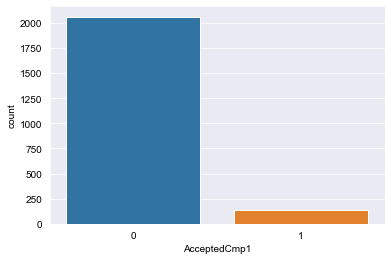

In [7]:
sns.countplot(x=df['AcceptedCmp1'])
pd.value_counts(df['AcceptedCmp1'])

0    2174
1      30
Name: AcceptedCmp2, dtype: int64

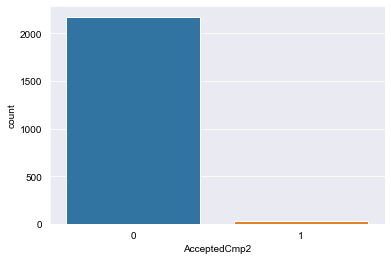

In [8]:
sns.countplot(x=df['AcceptedCmp2'])
pd.value_counts(df['AcceptedCmp2'])

0    2041
1     163
Name: AcceptedCmp3, dtype: int64

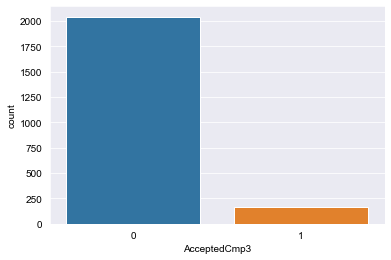

In [9]:
sns.countplot(x=df['AcceptedCmp3'])
pd.value_counts(df['AcceptedCmp3'])

0    2040
1     164
Name: AcceptedCmp4, dtype: int64

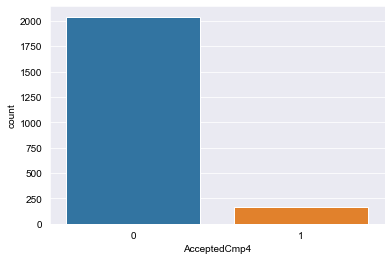

In [10]:
sns.countplot(x=df['AcceptedCmp4'])
pd.value_counts(df['AcceptedCmp4'])

0    2042
1     162
Name: AcceptedCmp5, dtype: int64

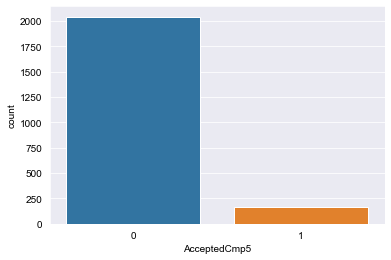

In [11]:
sns.countplot(x=df['AcceptedCmp5'])
pd.value_counts(df['AcceptedCmp5'])

0    1871
1     333
Name: Response, dtype: int64

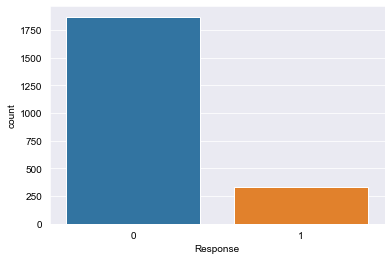

In [12]:
sns.countplot(x=df['Response'])
pd.value_counts(df['Response'])

# Income

<AxesSubplot:xlabel='Income', ylabel='Count'>

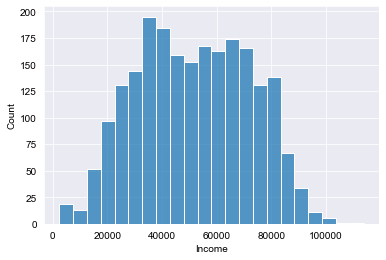

In [13]:
sns.histplot(df, x='Income')